# Solution to Diffusion Equation Using Separation of Variables

The **purpose** of this code is to solve the diffusion partial differential equation (PDE) using separation of variables. In this way, we can get the solution to a PDE by splitting it into 2 different ordinary differential equations (ODE). After this, we can use the boundary conditions provided to determine constants. Next, we apply an initial condition that is consisten with the physical problem we are dealing with; in this case that problem is diffusion. Finally, we can visualize the results to get a more intuitive understanding of what is going on!

## Getting the General Solution

In [2]:
import sympy as sp
sp.init_session(quiet=True)
sp.init_printing()

Let's symbolically see what we are starting to do in this problem. We begin by assuming that the solution has a spatially-dependent part and a time-dependent part. We can represent the space-dependent portion using *X* and the time dependent portion using *T.*

$$ 
c(x,t) = X(x) T(t) 
$$

Next, let's substitute this form of the solution into Fick's Law of Diffusion, and the diffusion coefficient *D.* 

$$
\frac{\partial c(x,t)}{\partial t} = D \frac{\partial^2 c(x,t)}{\partial x^2}
$$

Next, we subsitute *c(x,t)* with *X(x)* and *T(t).* 

$$ \frac{\partial X(x) T(t)}{\partial t} = D \frac{\partial^2 X(x) T(t)}{\partial x^2} $$

Now, let's use python to separate the variables of this PDE. First, let's define the varibales that we will be using in the diffusion equation. *X* and *T* are functions of space and time, *alpha, gamma,* and *c* are positive variables, and *C1* and *C2* are constants we get through integration. We will let *D* be equal to *alpha^2.*

In [3]:
var('X,T',cls=Function)
var('alpha gamma c', positive=True)
var('C1 C2')

Using the equation above, we can put all values dependent on time on one side and all the valyes dependent on space on the other side. This allows us to effectively split the PDE into 2 ODES: one dependent on time and one dependent on space. Below, we write out the equation for the time-dependent ODE and save it into *timeODE* and below that, we do the save for the space-dependent ODE.  

We can see that we set these equations equal to -gamma^2. This is because -gamma^2 serves as a separation constant and since the *timeODE* and *spaceODE* depend on different variables, the only way they can be equal is if they are both equal to a constant. 

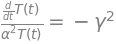

In [3]:
timeODE = sp.Eq(T(t).diff(t,1)/(alpha**2*T(t)),-gamma**2)
timeODE

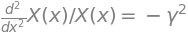

In [4]:
spaceODE = sp.Eq(X(x).diff(x,2)/X(x),-gamma**2)
spaceODE

Now, lets solve for the function of time, *T(t)* using *dsolve.* 

In [5]:
sp.dsolve(timeODE,T(t))

If we want a different form of the above equation (for example one that writes *C1* as a constant being multiplied by other terms), we can use the following code and get the *1st_linear.* We save that new form into *timePiece.*

In [6]:
list_of_hints = sp.classify_ode(timeODE)
list_of_solutions = [sp.dsolve(timeODE,T(t), hint=hint) for hint in list_of_hints]
list_of_solutions

⎡                                                                             
⎢                                                                             
⎢         2 ⎛      2  ⎞           2 ⎛      2  ⎞               2  2            
⎢        α ⋅⎝C₁ - γ ⋅t⎠          α ⋅⎝C₁ - γ ⋅t⎠             -α ⋅γ ⋅t          
⎢T(t) = ℯ              , T(t) = ℯ              , T(t) = C₁⋅ℯ        , T(t) = C
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎣                                                                             

                                                                              
                                                                              
                     4  4  2       6  6  3       8  8  4       10  10  5      
        2  2     C₁⋅α ⋅γ ⋅t    C₁⋅α ⋅γ ⋅t    C₁⋅α ⋅

In [7]:
timePiece = sp.dsolve(timeODE,T(t), hint='1st_linear')
timePiece

We do the same thing with the *spaceODE* where we solve for the space function, *X(x)* using *dsolve.*

In [8]:
spacePiece = sp.dsolve(spaceODE,X(x))
spacePiece

We know that the general solution, which was originally our *c(x,t),* is equal to *X(x)T(x),* so we multiply the equations we got in the last two steps for *X(x)* and *T(t).* To eliminate a third constant coming from the *timePiece,* let's set that constant as equal to 1. We can do this as the product of the other two constants is also a constant. 

In [9]:
generalSolution = (timePiece.rhs).subs(C1,1)*spacePiece.rhs
generalSolution

## Applying Boundary Conditions 

$$
\begin{array}{lll}
\mathrm{PDE} & u_t = u_{xx} & 0 \le x \le 1 \\
\mathrm{BCs} & u(0,t) = 0 & 0 \le t \le \infty \\
 & u(1,t) = 0 & \\
\mathrm{IC}  & u(x,0) = 1 & 0 \le x \le 1
\end{array}
$$

Now that we have our general solution, let's apply boundary conditions so that we can find our constants and get the particular solution. If we use the first boundary condition and let *x=0,* the only way the general solution can still equal 0 is when *C2 = 0.* Next, if we apply the 2nd boundary condition, we get a solution but not exactly the one we are interested in. So, we apply the initial condition that gives *t=0*, and knowing that *C2 = 0.* 

In [10]:
genSub = generalSolution.subs({t:0, C2:0, gamma:n*sp.pi})
genSub

We als know that when *t = 0,* the solution is equal to 1. The domain of the space component is also from 0 to 1. Below, we map what that looks like. Essentianlly, we can boundary conditions that are 0 when *x = 0* and 1. In between those boundarys, the solution is 1. Plotting from -1 to 1, we get the graph below. We plot from -1 to 1 because the "average" of the values will be 0, aligning with the boundary conditions, rather than 0.5. 

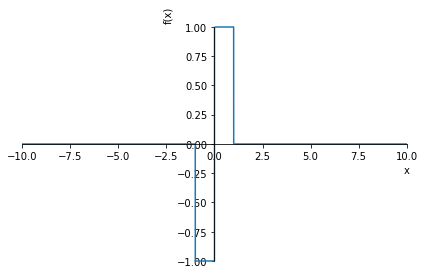

In [34]:
p = sp.Piecewise((0,x<-1),(-1,x<0),(1,x<1),(0,True))
sp.plot(p)

Here, we find the Fourier sine expansion of the plot we are trying to mimic above, *p.* We choose *sine* because that function allows our boundary conditions to be 0. We can see the first 4 terms of the fourier expansion below. We can compare this fourier series to what *genSub* gives above. We can treat 4/pi, 4/3pi, 4/5pi and so forth as the constant *C1* while *n* is the constant in front of pi and *x,* or 1,3,5 and so forth. 

In [35]:
fourierrep = sp.fourier_series(p,(-1,1)).truncate(4)
fourierrep

Now, let's plot what that fourier expansion looks like. 

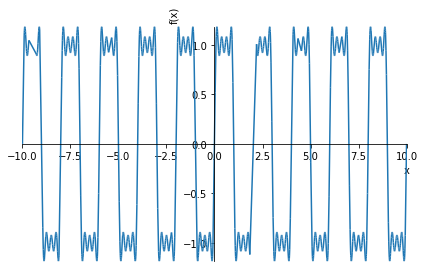

In [36]:
sp.plot(fourierrep)

This fourier expansion, based on the boundary conditions and the initial conditions, will be our solution to our diffusion equation. Below, we make a function, *solutionAtX* with parameters *x,t,alpha,* and *terms.* Within the function, we write a for loop that sums all the specific number of terms in the fourier expansion that is given, along with a given alpha (representing the diffusion coefficient), as well as x and t. 

After this, we have code for plotting the results of this function. 

In [37]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact

def solutionAtX(x, t, alpha, terms):
    # This is an already developed solution to the diffusion equation.
    # If you can follow along in the lecture - your solution will look
    # identical.
    return sum([(4*np.sin(x*np.pi*(2*n-1))/(np.pi*(2*n-1)))*np.exp(-t*(alpha*n*np.pi)**2) for n in range(1,terms+1,1)])

def make_plot(t=0.01, alpha=0.2, terms=20):
    plt.figure(figsize=(7,5))
    x = np.arange(0, 1, 0.001)
    y = solutionAtX(x, t, alpha, terms)
    y1 = np.ones_like(x) 
    plt.plot(x, y, x, y1, 'orange')
    plt.fill_between(x, 0, y, alpha=0.2)
    plt.ylim(0.0, 1.1)
    plt.xlabel('Distance')
    plt.ylabel('Concentration')
    plt.show()

In [38]:
interact(make_plot, t=(0.01,2,0.01), alpha=(0.2,0.5,0.01), terms=(1,40,1));

interactive(children=(FloatSlider(value=0.01, description='t', max=2.0, min=0.01, step=0.01), FloatSlider(valu…

## Information This Graph Shows 

The shaded blue area shows the substance, whether that may be heat, or molecule, or even dogs. Changing the parameters on the graph shows a couple of key points. The graph above shows that as time increases, there is less substance in the given space between 0 and 1. In other words, substance is escaping the boundarys as time goes on. Additionally, it shows that as the diffusivity constant, alpha, increases, the total amount of substance decreases as well. This makes sense, as if the diffusion constant increases, it causes the rate of diffusion to be faster; as a result, more substance escapes the boundaries. Finally, that graph shows that as you increase the number of terms, the closer the Fourier Series approximation gets to the initial condition value of 1 in between the x values of 0 and 1. 

The **physical impossibility** in this problem is that temperature can never be discontinous. Temperature must be contious at the boundary. We could say that near the boundary, the slope of the line is infinitely steep, or the temperature rapidly changes to comply with this physical impossibility. 